# [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone)

## Description of the Dataset

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samples are highly overlapped.  Further information is required
	to separate completely using affine combinations.  Other restrictions
	to data set examined.

   David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of
   Dystal and Backpropagation", submitted to the Australian Conference on
   Neural Networks (ACNN'96). Data set treated as a 3-category classification
   problem (grouping ring classes 1-8, 9 and 10, and 11 on).

   -- Test set performance (3133 training, 1044 testing as above):
	64%    Backprop
	55%    Dystal
   -- Previous work (Waugh, 1995) on same data set:
	61.40% Cascade-Correlation (no hidden nodes)
	65.61% Cascade-Correlation (5 hidden nodes)
	59.2%  C4.5
	32.57% Linear Discriminate Analysis
	62.46% k=5 Nearest Neighbour


4. Relevant Information Paragraph:

   Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.

   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).

   Data comes from an original (non-machine-learning) study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)


5. Number of Instances: 4177


6. Number of Attributes: 8


7. Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

   Statistics for numeric domains:

		Length	Diam	Height	Whole	Shucked	Viscera	Shell	Rings
	Min	0.075	0.055	0.000	0.002	0.001	0.001	0.002	    1
	Max	0.815	0.650	1.130	2.826	1.488	0.760	1.005	   29
	Mean	0.524	0.408	0.140	0.829	0.359	0.181	0.239	9.934
	SD	0.120	0.099	0.042	0.490	0.222	0.110	0.139	3.224
	Correl	0.557	0.575	0.557	0.540	0.421	0.504	0.628	  1.0


8. Missing Attribute Values: None


9. Class Distribution:

	Class	Examples
	-----	--------
	1	1
	2	1
	3	15
	4	57
	5	115
	6	259
	7	391
	8	568
	9	689
	10	634
	11	487
	12	267
	13	203
	14	126
	15	103
	16	67
	17	58
	18	42
	19	32
	20	26
	21	14
	22	6
	23	9
	24	2
	25	1
	26	1
	27	2
	29	1
	-----	----
	Total	4177


***

## Import Libraries

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

## Read Data

In [82]:
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
df1 = pd.read_csv('abalone.data', header=None, names=['Class', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell','Rings'])
df1.head()

,Class,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Split Features and Target Labels

In [83]:
X = df1.iloc[:, 1:]

In [84]:
X.shape

(4177, 8)

In [85]:
y = df1['Class']
np.unique(y)

array(['F', 'I', 'M'], dtype=object)

In [86]:
# Transform categorical to numeric
def transform(X):
    if X=='F':
        return 0
    if X=='M':
        return 1
    if X=='I':
        return 2    

In [87]:
y = df1['Class'].apply(transform)
np.unique(y)

array([0, 1, 2], dtype=int64)

## Standardize Data

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [89]:
# Data in original dimension
X_sc.shape

(4177, 8)

## Apply PCA

In [90]:
from sklearn.decomposition import PCA

# Number of components is None - we are not reducing the dimension - find all the Principal Components
pca = PCA(n_components=None)
pca.fit(X_sc)

np.cumsum(pca.explained_variance_ratio_)

array([0.83905489, 0.92600651, 0.9583119 , 0.97906064, 0.98967934,
       0.99761344, 0.99920021, 1.        ])

#### Only first  4 Principal Components is able to explain 97.9% variance in the dataset.

#### Only first 5 Principal Components is able to explain 98.9% variance in the dataset.

#### Only first 6 Principal Components is able to explain 99.7% variance in the dataset.


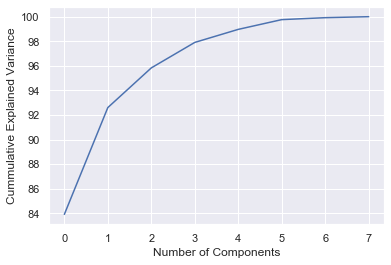

In [91]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance');

## Dimension Reduction with PCA - Take First 4 Principal Components

In [92]:
pca = PCA(n_components=4)
pca.fit(X_sc)
X_tr = pca.transform(X_sc)
X_tr.shape

(4177, 4)

In [93]:
X_tr

array([[-1.32291442,  1.79565502, -0.78981594, -0.21931559],
       [-3.48365134, -0.09283156, -0.06301054,  0.24997171],
       [-0.53616125, -0.04940728,  0.22927472, -0.44722137],
       ...,
       [ 2.03301641, -0.69391768,  0.9370173 ,  0.29820072],
       [ 1.60123963, -0.46575061, -0.20441808, -0.33186727],
       [ 4.89861662, -0.80973552, -0.49177154,  0.52127292]])

## Make Predictions with Original Dimensions and Reduced Dimension

In [94]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_sc, y)

print ('Before PCA - Original Dimension - score', model.score(X_sc, y))

model.fit(X_tr, y)
print ('After PCA  - Dimension Reduced - score', model.score(X_tr, y))

Before PCA - Original Dimension - score 0.5614077088819727
After PCA  - Dimension Reduced - score 0.5525496768015322


#### Check the performance. How only first 4 Principal Components are able to achieve comparable scores.
#### Only first 4 Principal Components is able to explain 97.9% variance in the dataset.

***